# Interactive comp_report analysis for MIKK panel paper

In [1]:
from datetime import date

print('Adrien Leger / EMBL EBI')
print('Starting date : 2020_07_09')
print('Last modification date : {}_{:02}_{:02}'.format(date.today().year, date.today().month, date.today().day))

Adrien Leger / EMBL EBI
Starting date : 2020_07_09
Last modification date : 2021_02_15


In [2]:
# Standard lib imports
import os
from datetime import date
from collections import *
from glob import glob, iglob
from shutil import rmtree
import itertools
from pprint import pprint as pp
from tqdm import tqdm

# Ploting lib imports
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline

# Data wrangling lib imports
import pandas as pd
import numpy as np
import scipy as sp
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 200
pd.options.display.max_rows = 50
pd.options.display.min_rows = 50

# pycoMeth imports
from pycoMeth import Comp_Report
from pycoMeth.common import *

## Re-generate report and tables with Comp_report

In [5]:
Comp_Report.Comp_Report(
    methcomp_fn = "../methylation/pycometh_meth_comp/meth_comp.tsv.gz",
    gff3_fn = "../input/annotation/annotation.gff3",
    ref_fasta_fn="../input/genome/genome.fa",
    outdir="Comp_Report",
    max_tss_distance=100000,
    report_non_significant=True,
    export_static_plots=True,
    n_top=100,
    progress=True)

## Checking options and input files ##
## Loading and preparing data ##
	Loading Methcomp data from TSV file
	Loading transcripts info from GFF file
	Loading chromosome info from reference FASTA file
	Number of significant intervals found (adjusted pvalue<0.01): 4459
	Finding top candidates
	Creating output directory structure
	Computing source md5
## Parsing methcomp data ##
	Iterating over significant intervals
	Progress: 100%|██████████| 13.5k/13.5k [02:56<00:00, 76.6 intervals/s] 
	Generating summary report


## Run Comp_report in API mode

In [5]:
kaleido = Kaleido()

all_interval_df, all_cpg_df, top_cpg_df_d  = Comp_Report.Comp_Report(
    methcomp_fn = "../methylation/pycometh_meth_comp/meth_comp.tsv.gz",
    gff3_fn = "../input/annotation/annotation.gff3",
    ref_fasta_fn="../input/genome/genome.fa",
    max_tss_distance=100000,
    report_non_significant=True,
    export_static_plots=True,
    n_top=100,
    progress=True,
    api_mode=True)

display(all_interval_df.head())
display(all_cpg_df.head())
display(top_cpg_df_d[1].head())

## Checking options and input files ##
## Loading and preparing data ##
	Loading Methcomp data from TSV file
	Loading transcripts info from GFF file
	Loading chromosome info from reference FASTA file
	Number of significant intervals found (adjusted pvalue<0.01): 4459
	Finding top candidates
## Parsing methcomp data ##
	Iterating over significant intervals
	Progress: 100%|██████████| 13.5k/13.5k [01:28<00:00, 153 intervals/s]


,pvalue,chromosome,start,end,Number of nearby TSS,closest tx id,closest tx name,closest tx biotype,distance to tss
8248,1.356767e-60,15,13014693,13015794,26,ensorlt00000004176,<NA>,protein_coding,0
8958,5.419422e-58,16,26220047,26221325,10,ensorlt00000019438,sh3bp5b-201,protein_coding,-24958
9157,1.460814e-56,17,316390,318610,5,ensorlt00000002667,<NA>,protein_coding,-155
6448,6.734997e-55,11,27686928,27688355,3,ensorlt00000017935,<NA>,protein_coding,-21358
791,1.222103e-54,2,12169442,12171060,3,ensorlt00000028404,<NA>,protein_coding,-21573


,1-144916-145207,1-308880-309181,1-503417-503927,1-514965-516003,1-623809-625652,1-705597-706281,1-729239-730182,1-792588-793312,1-1077484-1077924,1-1083490-1083838,1-1162762-1163132,1-1314335-1314688,1-1407374-1407856,1-1567989-1568395,1-1608911-1609767,1-1674985-1675480,1-1675488-1675956,1-1721586-1722396,1-1770059-1770326,1-1838063-1838528,1-1875134-1875587,1-1886315-1886690,1-2071678-2072757,1-2097745-2098143,1-2238510-2239209,1-2295313-2295670,1-2315012-2315573,1-2445634-2445840,1-2610894-2611179,1-2611213-2611524,1-2662481-2662925,1-2721484-2722005,1-2722046-2722408,1-2892537-2892998,1-2911701-2911958,1-2917743-2917943,1-2941104-2941570,1-3036982-3037405,1-3082769-3083275,1-3694381-3694754,1-3739186-3739861,1-3750364-3751169,1-3810554-3810790,1-4095356-4095859,1-4096105-4096487,1-4117891-4118603,1-4118637-4119269,1-4156195-4156667,1-4209316-4209554,1-4210696-4210939,1-4423101-4423400,1-4466796-4467117,1-4474987-4475265,1-4475488-4475826,1-4544144-4544701,1-4595628-4596338,1-4729934-4730205,1-4774757-4774987,1-5146500-5146967,1-5928196-5928609,1-6729414-6729850,1-6774682-6775026,1-7052758-7053065,1-7229546-7229860,1-7288889-7289271,1-7484440-7484732,1-7558295-7558502,1-7634744-7635260,1-7913006-7914086,1-7941136-7941712,1-7960810-7961345,1-8058635-8059035,1-8239555-8239869,1-8350937-8351679,1-8732123-8732385,1-8868981-8869383,1-9273888-9274268,1-9405889-9406460,1-9694709-9695050,1-9790590-9790910,1-9793456-9794027,1-9798564-9799797,1-9989122-9989650,1-10166584-10166954,1-10183126-10183523,1-10335071-10335357,1-10502361-10502818,1-10915627-10916151,1-10994408-10994852,1-11045175-11045705,1-11500040-11500338,1-11529952-11530190,1-11796099-11796384,1-11931046-11931285,1-11947687-11948071,1-12220479-12220795,1-12526562-12526854,1-13514916-13515116,1-13644895-13645543,1-13733860-13734226,...,24-6328489-6329255,24-6404478-6404752,24-6675573-6676097,24-6812397-6812738,24-6995844-6996396,24-7334023-7334274,24-7518337-7518631,24-7611402-7612623,24-7649864-7650351,24-7774841-7775238,24-7810933-7811134,24-7821210-7821542,24-8156222-8156594,24-8383584-8383940,24-8537295-8537771,24-9158708-9159029,24-9216395-9216815,24-9328960-9329355,24-9419556-9420056,24-9541567-9542264,24-9820588-9820793,24-10002319-10002722,24-10041626-10041978,24-10286328-10287069,24-10287660-10288456,24-10512697-10513979,24-10520870-10521544,24-10570433-10570973,24-11806195-11806718,24-12057848-12058213,24-12153331-12153814,24-12379492-12379848,24-12825983-12826597,24-12958029-12958377,24-13163208-13163895,24-13167350-13167965,24-13468129-13468340,24-13543004-13543552,24-13689132-13690047,24-13697235-13697610,24-13782409-13783142,24-13869700-13870006,24-13999201-13999843,24-14047997-14048212,24-14120465-14120675,24-14186339-14186761,24-14813270-14813477,24-14813515-14813939,24-14866694-14867102,24-14867308-14867600,24-14871985-14872442,24-14876825-14877190,24-14898966-14899287,24-15119772-15120578,24-15523657-15524047,24-15524126-15524635,24-16594188-16594404,24-16760089-16760342,24-17728427-17728898,24-17818659-17819024,24-18553414-18553664,24-18580244-18580866,24-18823520-18823960,24-18942470-18943056,24-19024748-19025136,24-19224549-19225348,24-19540491-19540782,24-19596059-19596501,24-19682477-19682862,24-19977933-19978154,24-20009269-20009888,24-20024032-20024509,24-20104999-20105489,24-20191917-20192266,24-20275449-20275979,24-20277634-20278075,24-20278383-20278642,24-20458640-20458995,24-20487597-20488128,24-20607471-20607690,24-20717784-20718108,24-21160838-21161038,24-21407316-21407672,24-22058632-22059037,24-22331849-22332483,24-22382403-22382773,24-22450901-22451237,24-22452449-22452848,24-22479632-22480285,24-22584245-22584601,24-22687408-22688085,24-22745831-22746065,24-22760710-22761123,24-22892617-22893113,24-22976967-22977302,24-23077665-23078207,24-23087422-23087931,24-23134697-23135071,24-23191101-23191433,24-23288601-23290069
Sample 11-1_A3,-2.325,0.655,2.598,-2.230,-0.968,2.602,-2.085,1.735,3.102,NaN,2.855,-2.058,1.460,0.850,3.51,1.890,2.360,

,"15-13,014,749","15-13,014,782","15-13,014,816","15-13,014,843","15-13,014,877","15-13,014,898","15-13,014,924","15-13,014,946","15-13,014,972","15-13,015,026","15-13,015,062","15-13,015,109","15-13,015,144","15-13,015,189","15-13,015,215","15-13,015,233","15-13,015,251","15-13,015,269","15-13,015,286","15-13,015,327","15-13,015,353","15-13,015,367","15-13,015,391","15-13,015,413","15-13,015,433","15-13,015,461","15-13,015,479","15-13,015,493","15-13,015,516","15-13,015,542","15-13,015,568","15-13,015,595","15-13,015,618","15-13,015,629","15-13,015,651","15-13,015,671","15-13,015,693","15-13,015,739","15-13,015,768"
Sample 11-1_A3,-1.510,-2.730,-5.46,-0.320,-3.330,-7.600,-1.490,-2.210,-1.690,-1.290,-2.23,-2.850,-1.890,-2.560,-1.190,-4.62,0.17,-2.060,-2.26,-11.52,-0.29,-2.00,-3.55,-8.010,-1.15,-1.925,-1.15,-3.94,-4.050,-10.740,-3.065,-7.785,-1.520,-2.795,-1.630,-2.330,-3.350,-1.90,-2.18
Sample 117-2_C4,-1.775,-1.010,-3.16,0.030,1.120,4.520,2.840,3.990,6.885,0.290,2.27,1.720,1.110,4.260,1.060,2.61,0.31,0.210,1.78,3.44,1.78,1.50,2.34,2.790,1.21,2.240,0.44,2.71,3.260,5.800,1.040,2.290,0.880,0.430,2.140,-0.290,-0.830,-0.13,0.60
Sample 131-1_F4,-1.210,-3.400,-4.31,-0.810,-0.995,-13.525,0.300,-1.740,-4.870,-2.110,-3.95,-2.215,-5.885,-5.215,-2.260,-4.40,-3.79,-3.605,-3.76,-18.58,-1.06,-2.44,-5.67,-12.180,-1.78,-3.580,-1.72,-5.36,-6.845,-13.535,-2.915,-9.220,-1.485,-4.485,-1.825,-2.885,-3.995,-2.57,-4.33
Sample 134-1_H4,-2.875,-4.845,-4.02,-0.845,-4.675,-7.845,-0.065,-2.525,-3.125,-0.555,-1.60,-0.120,-0.790,-0.420,-2.175,-4.21,-1.22,-4.000,-3.30,-10.58,-0.67,-2.01,-2.77,-7.780,-0.27,-0.980,-1.51,-1.76,-4.740,-7.200,-2.500,-5.920,0.140,-2.160,-0.450,-1.220,-1.830,-0.54,-1.98
Sample 134-2_A5,-0.500,3.230,-3.22,0.000,3.620,7.900,2.180,4.380,3.160,1.570,2.77,3.030,4.535,2.950,3.060,4.31,2.30,2.330,3.85,9.95,2.61,1.92,2.22,8.365,1.84,2.500,1.32,8.79,7.540,8.830,1.700,3.860,2.405,1.475,2.860,1.765,1.600,1.69,1.82


### Render overall figures

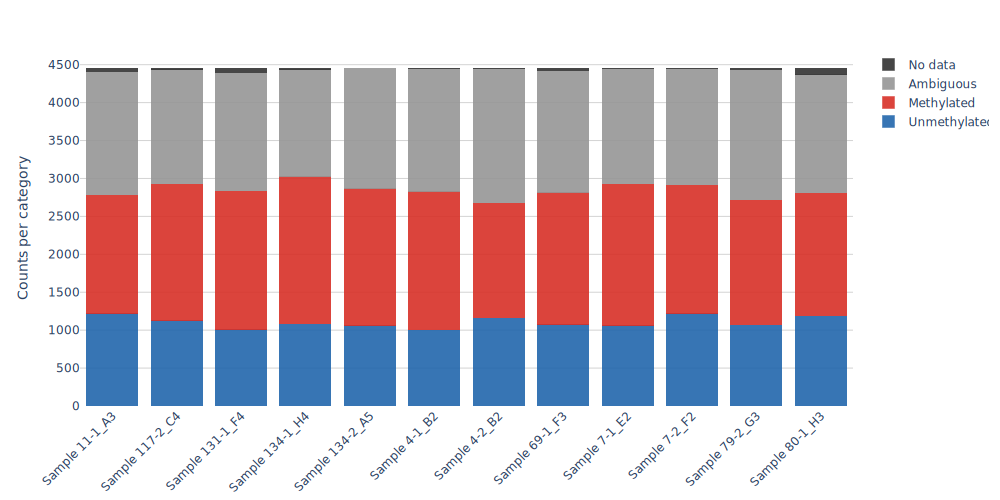

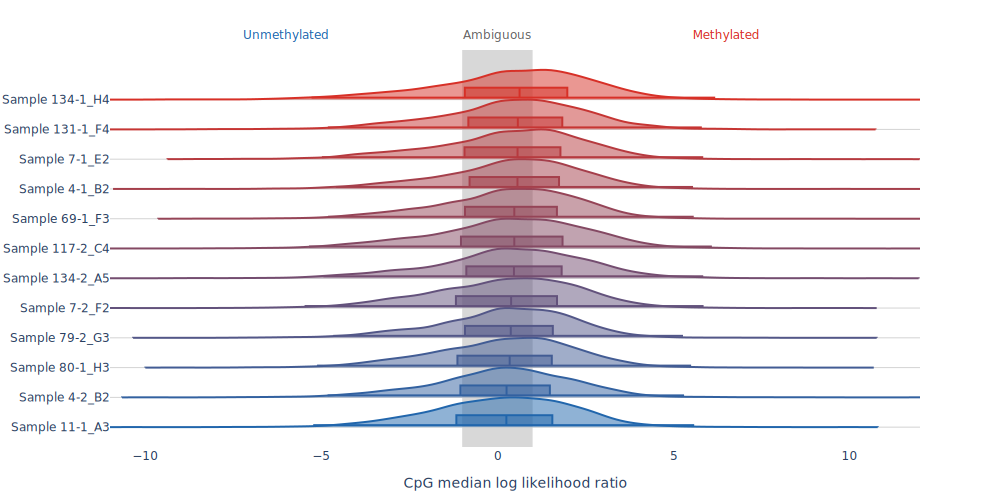

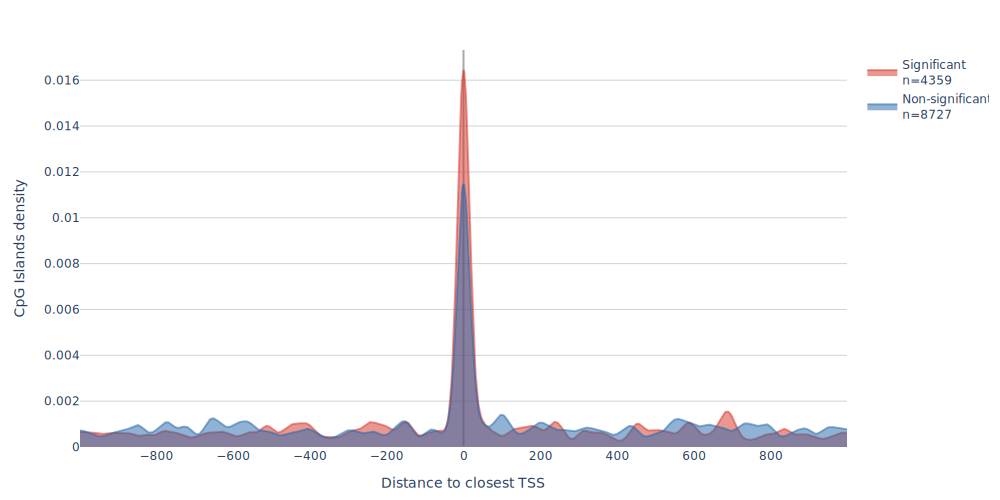

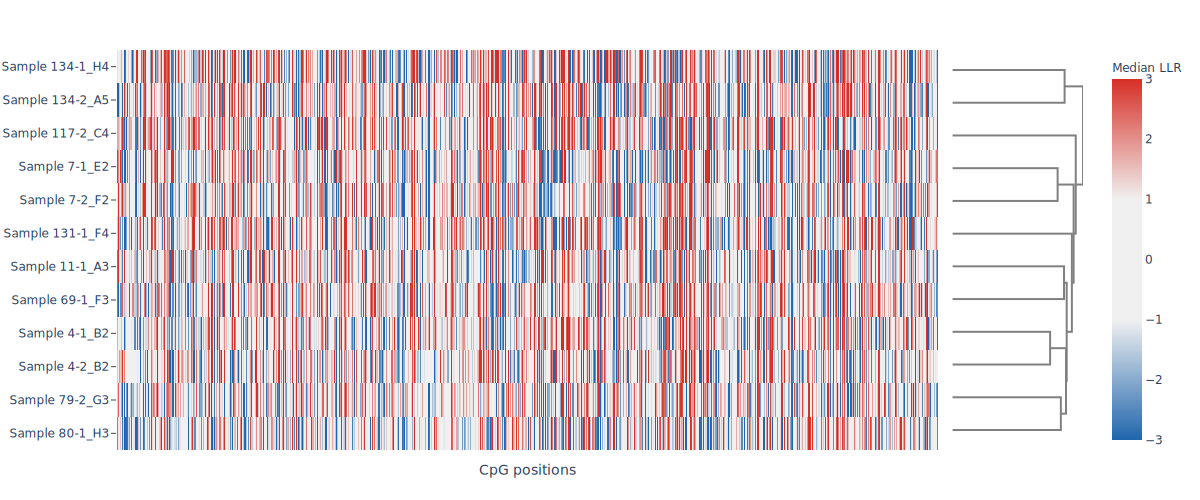

In [10]:
outdir = "all_sites"
rmtree(outdir, ignore_errors=True)
mkdir(outdir)

fig = Comp_Report.category_barplot(all_cpg_df)
display(kaleido.render_plotly_svg(fig, width=1000))
kaleido.export_plotly_svg(fig, fn=os.path.join(outdir, "all_catplot.svg"), width=1000)

fig = Comp_Report.cpg_ridgeplot(all_cpg_df, scatter=False, box=True)
display(kaleido.render_plotly_svg(fig, width=1000))
kaleido.export_plotly_svg(fig, fn=os.path.join(outdir, "all_ridgeplot.svg"), width=1000)

fig = Comp_Report.tss_dist_plot(all_interval_df, max_distance=1000, n_bins=1000, smooth_sigma=8)
display(kaleido.render_plotly_svg(fig, width=1000))
kaleido.export_plotly_svg(fig, fn=os.path.join(outdir, "all_tss_dist.svg"), width=1000)

fig = Comp_Report.cpg_heatmap(all_cpg_df, lim_llr=3, column_widths=[0.85, 0.15])
display(kaleido.render_plotly_svg(fig, width=1200))
kaleido.export_plotly_svg(fig, fn=os.path.join(outdir, "all_heatmap.svg"), width=1200)

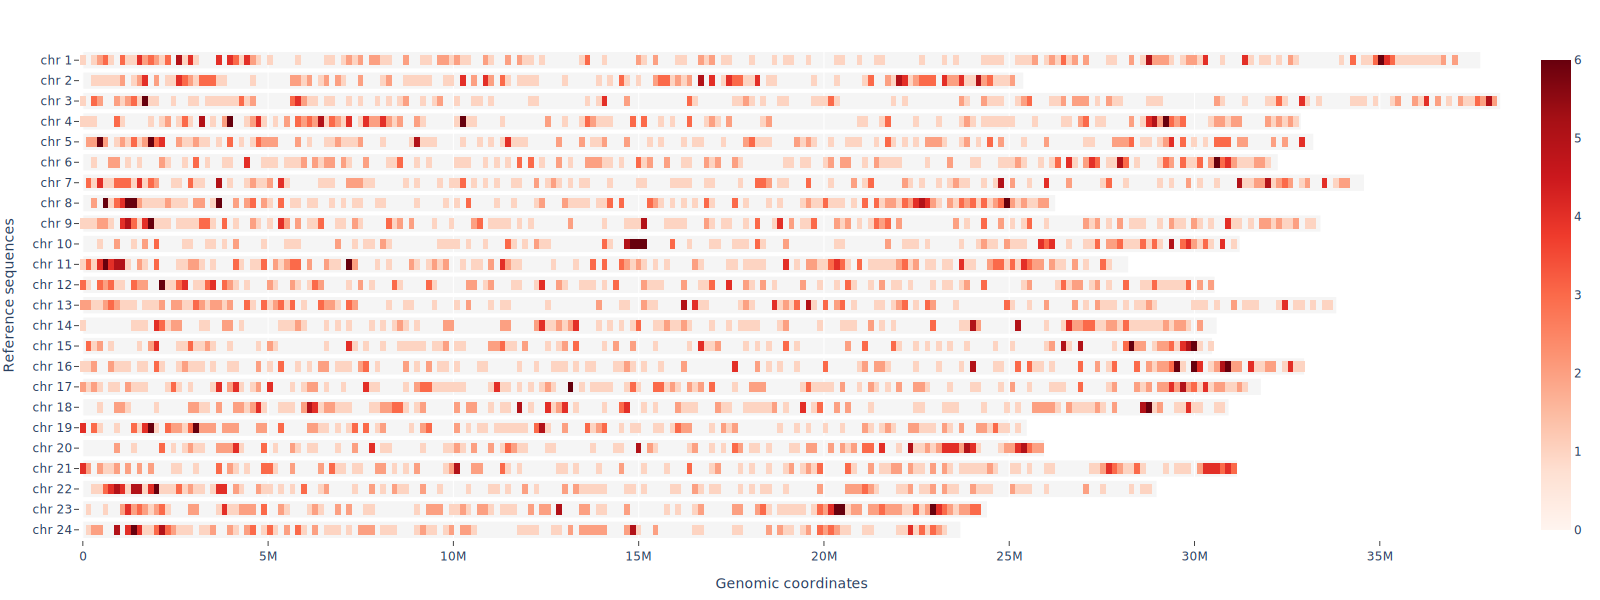

In [13]:
fig = Comp_Report.chr_ideogram_plot(all_cpg_df, ref_fasta_fn="../input/genome/genome.fa", n_len_bin=250, colorscale="Reds")
display(kaleido.render_plotly_svg(fig, width=1600, height=600))
kaleido.export_plotly_svg(fig, fn=os.path.join(outdir, "chr_ideogram_plot.svg"), width=1500, height=600)

### Render top figures

In [7]:
outdir = "top_sites"
rmtree(outdir, ignore_errors=True)
mkdir(outdir)

for rank, hit_df in tqdm(top_cpg_df_d.items()):
    fig = Comp_Report.category_barplot(hit_df)
    kaleido.export_plotly_svg(fig, fn=os.path.join(outdir, "top_{:03}_catplot.svg".format(rank)), width=800)
    fig = Comp_Report.cpg_ridgeplot(hit_df, trace_width=2)
    kaleido.export_plotly_svg(fig, fn=os.path.join(outdir, "top_{:03}_ridgeplot.svg".format(rank)), width=800)
    fig = Comp_Report.cpg_heatmap(hit_df, lim_llr=7, column_widths=[0.85, 0.15])
    kaleido.export_plotly_svg(fig, fn=os.path.join(outdir, "top_{:03}_heatmap.svg".format(rank)), width=800)

100%|██████████| 100/100 [01:01<00:00,  1.62it/s]
